<a href="https://colab.research.google.com/github/nurulashraf/polynomial-regression-manufacturing/blob/main/Polynomial_Regression_Manufacturing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/manufacturing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [3]:
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [13]:
X = df[['Material Fusion Metric']]
y = df['Quality Rating']

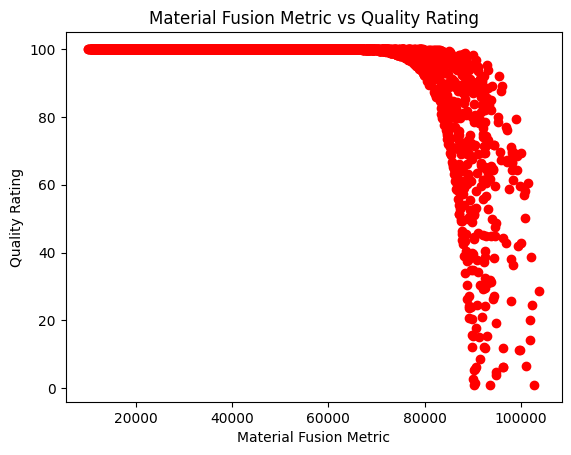

In [14]:
plt.scatter(X, y,color = 'red')
plt.xlabel('Material Fusion Metric')
plt.ylabel('Quality Rating')
plt.title('Material Fusion Metric vs Quality Rating')
plt.show()

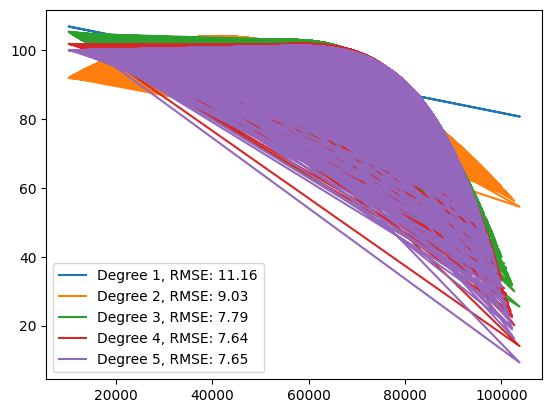

In [15]:
# Try polynomial degrees from 1 to 5
for degree in range(1, 6):
    # Step 1: Transform the original feature (X) into polynomial features (degree n)
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)  # Transform X into polynomial terms of the given degree

    # Step 2: Create a linear regression model and fit it using the transformed features
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)  # Fit the polynomial model to the data

    # Step 3: Predict the target variable using the polynomial regression model
    y_pred = poly_model.predict(X_poly)  # Make predictions on the transformed data

    # Step 4: Calculate RMSE (Root Mean Squared Error) to evaluate the model's performance
    mse = mean_squared_error(y, y_pred)  # Calculate Mean Squared Error
    rmse = np.sqrt(mse)  # Compute RMSE by taking the square root of MSE

    # Step 5: Plot the polynomial curve along with the actual data
    plt.plot(X, y_pred, label=f"Degree {degree}, RMSE: {rmse:.2f}")  # Plot the fitted curve and RMSE

# Add legend and show plot
plt.legend()
plt.show()

Degree 1: Train RMSE = 10.72, Test RMSE = 12.14
Degree 2: Train RMSE = 8.70, Test RMSE = 9.78
Degree 3: Train RMSE = 7.51, Test RMSE = 8.40
Degree 4: Train RMSE = 7.38, Test RMSE = 8.21
Degree 5: Train RMSE = 7.40, Test RMSE = 8.22


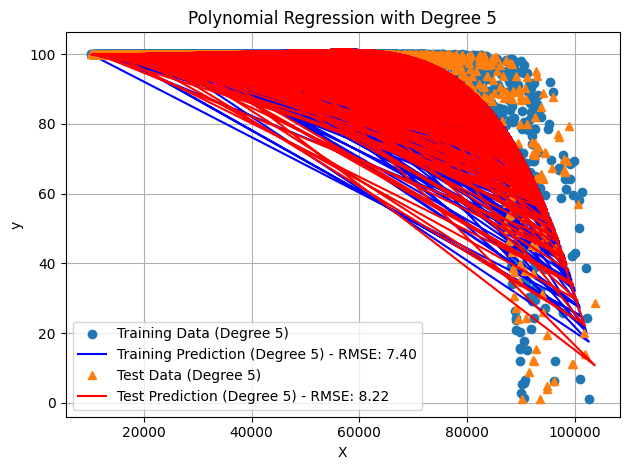

In [16]:
# Step 1: Split the dataset into training and testing sets
# 70% of data goes into training, 30% goes into testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Loop through polynomial degrees from 1 to 4 to evaluate different models
for degree in range(1,6):# Polynomial degrees 1, 2, 3, and 4
  poly = PolynomialFeatures(degree=degree)

# Fit and transform the training data into polynomial form
  X_train_poly = poly.fit_transform(X_train)  # Transforms X_train to include polynomial terms

# Transform the test data using the same polynomial features learned from training data
  X_test_poly = poly.transform(X_test)  # No need to fit on the test data, just transform

# Step 4 : Train the linear regression model
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly,y_train)

# Step5: Make prediction for both the training and test sets
  y_train_pred = poly_model.predict(X_train_poly)#Prediction for the training data
  y_test_pred = poly_model.predict(X_test_poly)#Prediction for the test data

# Step 6 : Calculate RMSE(Root mean squared error)
  train_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))

# Step 7: Print the results for each degree
  print(f"Degree {degree}: Train RMSE = {train_rmse:.2f}, Test RMSE = {test_rmse:.2f}")

plt.plot(X_train, y_train, 'o', label=f'Training Data (Degree {degree})')
plt.plot(X_train, y_train_pred, 'b-', label=f'Training Prediction (Degree {degree}) - RMSE: {train_rmse:.2f}')
plt.plot(X_test, y_test, '^', label=f'Test Data (Degree {degree})')
plt.plot(X_test, y_test_pred, 'r-', label=f'Test Prediction (Degree {degree}) - RMSE: {test_rmse:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Polynomial Regression with Degree {degree}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()